In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
a = yf.Ticker("AAPL")
apple  =  a.history(start="2018-08-05",  end="2021-08-05")
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-06,50.277473,50.579621,50.052676,50.536114,101701600,0.0000,0.0
2018-08-07,50.596540,50.640047,49.977737,50.062340,102349600,0.0000,0.0
2018-08-08,49.806126,50.231549,49.436297,50.096188,90102000,0.0000,0.0
2018-08-09,50.647300,50.707730,50.084096,50.490185,93970400,0.0000,0.0
2018-08-10,50.298555,50.720621,50.131183,50.339790,98444800,0.1825,0.0
...,...,...,...,...,...,...,...
2021-07-29,144.690002,146.550003,144.580002,145.639999,56699500,0.0000,0.0
2021-07-30,144.380005,146.330002,144.110001,145.860001,70382000,0.0000,0.0
2021-08-02,146.360001,146.949997,145.250000,145.520004,62880000,0.0000,0.0


In [2]:
def strategy(Df,a,b,c,d):
    df=Df.copy()
    df['Avg']=(df['Open']+df['Low']+df['High']+df['Close'])/4
    df['EMA_Fast'] = df['Avg'].ewm(span = a).mean()
    df['EMA_Slow'] = df['Avg'].ewm(span = b).mean()
    df['EMA_Diff']=df['EMA_Fast']- df['EMA_Slow']
    df['EMA_Diff-MA_EMA_Diff'] = (df['EMA_Diff']-(df['EMA_Diff'].rolling(window=c).mean()))
    df['X']=df['EMA_Diff-MA_EMA_Diff'].rolling(window=d).mean()
    return df
 

In [3]:
apple['X'] = strategy(apple, 20,50,3,4)['X']
apple['Cash'] = 0
apple['Shares'] = 0
apple_final = apple.filter([ 'Close','X' ,'Cash', 'Shares'])
apple_final.head()


,Close,X,Cash,Shares
Date,,,,
2018-08-06,50.536114,NaN,0,0
2018-08-07,50.062340,NaN,0,0
2018-08-08,50.096188,NaN,0,0
2018-08-09,50.490185,NaN,0,0
2018-08-10,50.339790,NaN,0,0


In [4]:
x=apple['X']
apple['X'] =x.dropna()
apple_final = apple[apple['X'].notnull()]
apple_final = apple_final.reset_index()
apple_final = apple_final.filter([ 'Close', 'X', 'Cash', 'Shares','Open'])
apple_final.iloc[0, 2] = 1000
apple_final

,Close,X,Cash,Shares,Open
0,50.664829,0.002818,1000,0,50.771559
1,50.878296,0.007209,0,0,50.977749
2,50.997150,0.008486,0,0,50.749732
3,51.744251,0.012359,0,0,51.363420
4,52.777592,0.019528,0,0,51.773367
...,...,...,...,...,...
745,145.639999,-0.020816,0,0,144.690002
746,145.860001,-0.084978,0,0,144.380005
747,145.520004,-0.127294,0,0,146.360001
748,147.360001,-0.122917,0,0,145.809998


In [5]:

for index in range(len(apple_final)):
    clp = apple_final.iloc[index, 0]
    x = apple_final.iloc[index, 1]
    cas = apple_final.iloc[index, 2]
    shr=apple_final.iloc[index, 3]
    cash=cas
    shares=0
    
                  
        
    if(x>=0):
        
            if (cas > 7*clp):
                shares = 7
                cash = cas - 7*clp
            elif (cash > 6*clp):
                shares = 6
                cash = cas - 6*clp
            elif (cash > 5*clp):
                shares = 5
                cash = cas - 5*clp
            else:
                shares = 0
                cash = cas
                
                
    else:
            if (shr >= 7):
                shares = -7
                cash = cas + 7*clp
            elif (shr >= 6):
                shares = -6
                cash = cas + 6*clp
            elif (shr >= 5):
                shares = -5
                cash = cas + 5*clp
            else:
                shares = 0
                cash = cas
                
                
    apple_final.iloc[index, 2] = cash
    apple_final.iloc[index, 3] = apple_final.iloc[index, 3] + shares               
    
    try:
        apple_final.iloc[index + 1, 2] = apple_final.iloc[index, 2]
        apple_final.iloc[index + 1, 3] = apple_final.iloc[index, 3]
    except:
        pass
        
apple_final    




,Close,X,Cash,Shares,Open
0,50.664829,0.002818,645.346195,7,50.771559
1,50.878296,0.007209,289.198124,14,50.977749
2,50.997150,0.008486,34.212372,19,50.749732
3,51.744251,0.012359,34.212372,19,51.363420
4,52.777592,0.019528,34.212372,19,51.773367
...,...,...,...,...,...
745,145.639999,-0.020816,1037.341064,14,144.690002
746,145.860001,-0.084978,2058.361069,7,144.380005
747,145.520004,-0.127294,3077.001099,0,146.360001
748,147.360001,-0.122917,3077.001099,0,145.809998


In [6]:
apple_final['Net Worth'] = apple_final['Cash'] + apple_final['Shares'] * apple_final['Close']
apple_final

,Close,X,Cash,Shares,Open,Net Worth
0,50.664829,0.002818,645.346195,7,50.771559,1000.000000
1,50.878296,0.007209,289.198124,14,50.977749,1001.494267
2,50.997150,0.008486,34.212372,19,50.749732,1003.158230
3,51.744251,0.012359,34.212372,19,51.363420,1017.353146
4,52.777592,0.019528,34.212372,19,51.773367,1036.986614
...,...,...,...,...,...,...
745,145.639999,-0.020816,1037.341064,14,144.690002,3076.301056
746,145.860001,-0.084978,2058.361069,7,144.380005,3079.381073
747,145.520004,-0.127294,3077.001099,0,146.360001,3077.001099
748,147.360001,-0.122917,3077.001099,0,145.809998,3077.001099


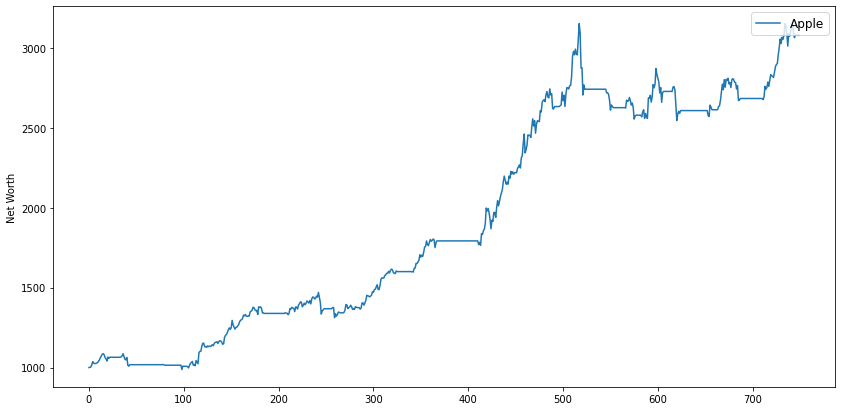

In [7]:
plt.figure(figsize = (14, 7))
plt.plot(apple_final.index, apple_final['Net Worth'], label = 'Apple')
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Net Worth')
plt.show()

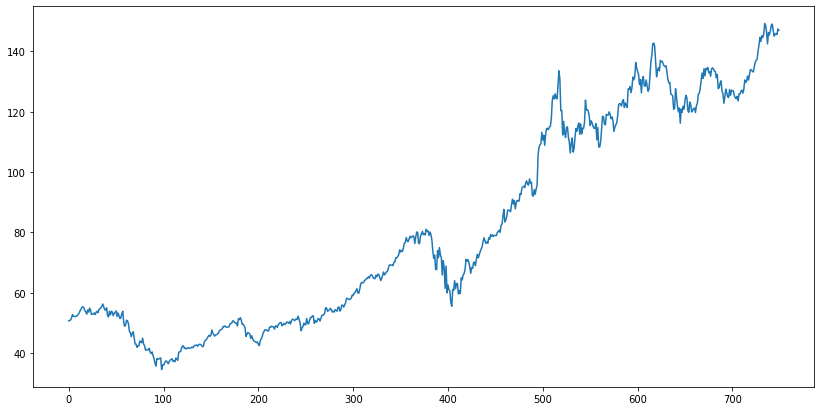

In [8]:
plt.figure(figsize = (14, 7))
plt.plot(apple_final.index, apple_final['Close'], label = 'Closing Price')

In [9]:
netprofit=((apple_final['Net Worth'][apple_final.index[-1]])-(apple_final['Net Worth'][apple_final.index[0]]))
print(netprofit)

2077.0010986328125


<AxesSubplot:>

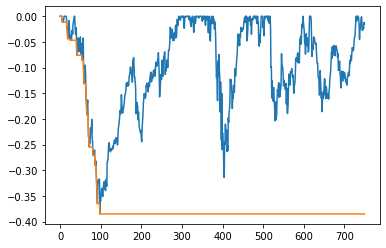

In [10]:
Roll_Max = apple_final['Close'].rolling(window=1095, min_periods=1).max()
Daily_Drawdown = apple_final['Close']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window=1095, min_periods=1).min()
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()

In [11]:
#The strategy aims to combine sensitivity of EMA which tend to signal good trades and also also use it asa momentum indicator to yield the profit from the given stock.This is an experimental strategy that has given better return than most other counterparts that included MACD,RSI and ADX.  